In [1]:
#Object Detection using ANN Model for cifar10 dataset available in keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print(Y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [2]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(Y_train, 10)
y_test = to_categorical(Y_test, 10)
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
predictions = model.predict(X_test[:5])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2731 - loss: 2.0476 - val_accuracy: 0.3734 - val_loss: 1.7391
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3976 - loss: 1.6848 - val_accuracy: 0.4324 - val_loss: 1.6163
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4295 - loss: 1.5916 - val_accuracy: 0.4394 - val_loss: 1.5749
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4505 - loss: 1.5374 - val_accuracy: 0.4494 - val_loss: 1.5474
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4648 - loss: 1.4964 - val_accuracy: 0.4662 - val_loss: 1.5089
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Text(0.5, 0, 'Cat 50% (Cat)')

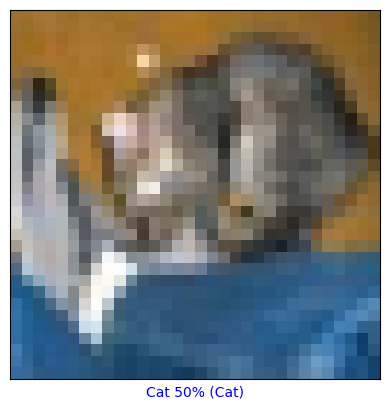

In [4]:


plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(X_test[0], cmap=plt.cm.binary)
predicted_label = np.argmax(predictions[0])
if predicted_label == Y_test[0][0]:
  color = 'blue'
else:
  color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[Y_test[0][0]]),
                                color=color)


In [5]:
predictions[0]

array([0.03201875, 0.07092101, 0.12479596, 0.33931962, 0.0767609 ,
       0.23253924, 0.06438833, 0.01501612, 0.03600481, 0.00823527],
      dtype=float32)